Predicting temperment to maybe make more specialized training classes for dogs based on predicted tendencies

## import libraries, packages, data

### libraries, packages

In [37]:
#import
import pandas as pd
import numpy as np
# import seaborn as sns
# sns.set(style='darkgrid')
import matplotlib.pyplot as plt
# %matplotlib inline
# import pandas_profiling
# import datetime
# import re
# import pprint
# pp = pprint.PrettyPrinter(indent=4)
# from collections import Counter
import warnings
warnings.filterwarnings('ignore')

#display multiple outputs from cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [38]:
#importing libraries & packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#display multiple outputs from cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# machine learning
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from imblearn.over_sampling import ADASYN, SMOTE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import svm
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix

### import clean data from part 1

In [39]:
# import Animal Control Incidents df
df = pd.read_csv('a_control.csv')

In [40]:
#df.info()

In [41]:
df = df[df['species']=='dog']

In [42]:
df.temperment.value_counts()

friendly     9078
normal       6240
nervous      4550
dangerous     613
Name: temperment, dtype: int64

In [43]:
df = df[['breed', 'size', 'color', 'temperment' ]]

In [44]:
df=df.dropna()

In [45]:
# # assign target
y = df["temperment"]

#remove target from features
df.drop(columns= ['temperment'], axis=1, inplace=True)

# dummy categorical features
#col_list = list(df.select_dtypes(include=['object']).columns)
col_list = list(df.columns)

# create dummies for categorical features, assign to X
df = pd.DataFrame(pd.get_dummies(data=df, drop_first=True
                   , prefix=col_list))
X = df


In [46]:

# X_train_d and y_train_d = using original standard test train spit dad
# that way, I can try out different resampling methods
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=33)

### functions

In [60]:
# print model report
def model_report(model, cm = True): 
    
    print('\nCross Validation Scoring:\n')
    
    train_score = model.score(X_train, y_train)
    print("train score: {:.4}%".format(train_score * 100))

    test_score = model.score(X_test, y_test)
    print("test score: {:.4}%".format(test_score * 100))
    
    if cm :

        cv_score = np.mean(cross_val_score(model, X, y, cv=3))
        print("cross val score: {:.4}%".format(cv_score * 100))

        print("\nClassification Report:")
        print(classification_report(actuals, predictions))

#         col_list = ['pred bite/dangerous', 'pred not_bite/not_dangerous']
#         ind_list = ['real bite/dangerous', 'real not_bite/not_dangerous']                     
# #         for x in y_test.unique():
# #             col_list.append('pred_'+ x)
# #             ind_list.append('real_'+x)


        print('\nConfusion matrix:'.format(accuracy_score))
        display(pd.DataFrame(confusion_matrix(y_test, predictions)
                             
#                              , columns=col_list, index=ind_list
                            ))


    else:
        pass

In [48]:
def plot_feats(model):
    n_features = X.shape[1]
    plt.figure(figsize=(8,10))
#     plt.barh(range(n_features), model.feature_importances_, align='center') 
#     plt.yticks(np.arange(n_features), (X.columns.values)) 
#     plt.xlabel("Feature importance")
#     plt.ylabel("Feature")
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(25).plot(kind='barh');
    plt.show();

In [49]:
def plot_matrix(classifier):

    disp = plot_confusion_matrix(classifier, X_test, y_test,
    #                                  display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
#     disp.ax_.set_title(title);
    plt.show();
#     np.set_printoptions(precision=2)

#     # Plot non-normalized confusion matrix
#     titles_options = [
#                       ("Normalized confusion matrix", 'true')]
#     for title, normalize in titles_options:
#         disp = plot_confusion_matrix(classifier, X_test, y_test,
#     #                                  display_labels=class_names,
#                                      cmap=plt.cm.Blues,
#                                      normalize=normalize)
#         disp.ax_.set_title(title)

# #         print(title)
# #         print(disp.confusion_matrix)

#     plt.show();

### Feature importance accoring to chi2 and ExtraTrees

In [50]:
# chi features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feats','Score']  #naming columns
print(featureScores.nlargest(25,'Score'))  #print best features


                      Feats       Score
93               size_large  170.348020
95               size_small  165.632715
48           breed_labrador  131.323946
27               breed_chow  106.758975
58                breed_pit  102.721372
23         breed_cane_corso   72.608549
94              size_medium   41.528149
26          breed_chihuahua   39.568756
9              breed_beagle   38.020862
118          color_blue,gry   31.808744
161               color_yel   28.344909
119          color_blue,wht   27.771933
143           color_gry,wht   25.295094
85            breed_terrier   23.055859
45              breed_hound   18.609383
40   breed_golden_retriever   16.694514
78           breed_shepherd   16.446612
120             color_bndle   15.354643
141            color_gry,tn   15.233878
68          breed_retriever   13.324439
39    breed_german_shepherd   13.122767
99              color_bk,br   12.952933
70               breed_rott   12.846903
132            color_br,red   12.360073


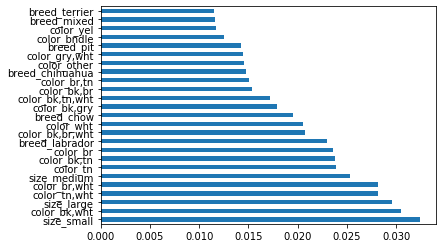

In [51]:
## extraTrees classifier feature importance
# # using extratrees to look at feature importance
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh');
plt.show();

## prep data

### resampling

Due to the imbalance of class data, it could be beneficial to resample to compensate for the missing data. Using SMOTE to oversample, then random undersampling.

In [53]:
over = SMOTE(random_state=3)
under = RandomUnderSampler( random_state=3)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_train, y_train = pipeline.fit_resample(X_train, y_train)

In [54]:
print (y_train.value_counts())

friendly     6144
dangerous    6144
normal       6144
nervous      6144
Name: temperment, dtype: int64


## __modeling__

Logistic Regression basic default model

In [61]:
lr = LogisticRegression(random_state=3)
lr.fit(X_train, y_train)
 
# Predict on training set
predictions = lr.predict(X_test)
actuals = y_test

model_report(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Cross Validation Scoring:

train score: 40.09%
test score: 29.67%
cross val score: 44.12%

Classification Report:
              precision    recall  f1-score   support

   dangerous       0.05      0.60      0.09       177
    friendly       0.50      0.50      0.50      2634
     nervous       0.30      0.12      0.17      1326
      normal       0.35      0.09      0.15      1812

    accuracy                           0.30      5949
   macro avg       0.30      0.33      0.23      5949
weighted avg       0.39      0.30      0.31      5949


Confusion matrix:


,0,1,2,3
0,106,39,22,10
1,932,1329,210,163
2,541,485,164,136
3,677,813,156,166


### decision tree

__default model__

In [75]:
# initialize and fit default decision tree
dt_model = DecisionTreeClassifier(random_state=3)
dt_model.fit(X_train, y_train)
predictions = dt_model.predict(X_test)
#actuals = y_test

model_report(dt_model)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')


Cross Validation Scoring:

train score: 54.9%
test score: 32.39%
cross val score: 42.28%

Classification Report:
              precision    recall  f1-score   support

   dangerous       0.06      0.43      0.10       177
    friendly       0.52      0.39      0.44      2634
     nervous       0.28      0.23      0.25      1326
      normal       0.33      0.29      0.31      1812

    accuracy                           0.32      5949
   macro avg       0.30      0.33      0.28      5949
weighted avg       0.39      0.32      0.35      5949


Confusion matrix:


,0,1,2,3
0,76,32,34,35
1,508,1027,421,678
2,352,343,305,326
3,379,592,322,519


#### grid searches

In [76]:
# set random search params
criterion=['gini','entropy']
max_leaf_nodes = [None]
max_features = [50,75,100,115,130,150]
max_depth = [50,100,125,150,175]
min_samples_split = [2,4,6,7,9]
min_samples_leaf = [1]

random_grid = {'criterion':criterion,
               'max_leaf_nodes': max_leaf_nodes,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               }

# random grid search
dt_random = RandomizedSearchCV(estimator = dt_model
                               , param_distributions = random_grid
                               , n_iter = 80, cv = 5, verbose=3, error_score=0
                               , random_state=3, n_jobs = -1);
# fit random search model
dt_random.fit(X_train, y_train);

print('best score: {:.4}%'.format(dt_random.best_score_ * 100));
print(dt_random.best_params_);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.4min finished


best score: 47.61%
{'min_samples_split': 6, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_features': 120, 'max_depth': 120, 'criterion': 'gini'}


__grid search__

In [82]:
# grid search params
param_grid_dt = {'criterion': ['entropy', 'gini'],
    'max_depth': [127,130,137,140,145],
    'min_samples_split': [4,5,6],
    'min_samples_leaf': [1,2,3],
     'max_features':[105,110,115],
     'max_leaf_nodes':[None]
        }

# grid search
gs_dt = GridSearchCV(estimator=dt_model,param_grid=param_grid_dt,error_score=0,
                    cv=5, n_jobs=-1, verbose=2)

# fitting grid search
gs_dt.fit(X_train, y_train)

# best parameters
print('Best score: {:.3}%'.format(gs_dt.best_score_ * 100))
print('params:\n', gs_dt.best_params_)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  8.1min finished


GridSearchCV(cv=5, error_score=0,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=3, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [110, 120, 130, 140, 150],
       

Best score: 47.7%
params:
 {'criterion': 'gini', 'max_depth': 130, 'max_features': 110, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [97]:
# using best params to fit model
dt_gs_model = DecisionTreeClassifier(criterion='gini',
                              max_depth=130,
                              max_features=110,
                              max_leaf_nodes= None,
                               min_samples_leaf=1,
                               min_samples_split=5
                                 )
dt_gs_model.fit(X_train, y_train)

predictions = dt_gs_model.predict(X_test)
actuals = y_test

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=130, max_features=110, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### final model

In [98]:
model_report(dt_gs_model)


Cross Validation Scoring:

train score: 54.37%
test score: 32.29%
cross val score: 42.28%

Classification Report:
              precision    recall  f1-score   support

   dangerous       0.06      0.43      0.10       177
    friendly       0.51      0.38      0.44      2634
     nervous       0.28      0.23      0.26      1326
      normal       0.33      0.29      0.31      1812

    accuracy                           0.32      5949
   macro avg       0.30      0.33      0.28      5949
weighted avg       0.39      0.32      0.35      5949


Confusion matrix:


,0,1,2,3
0,76,32,33,36
1,509,1012,430,683
2,352,342,310,322
3,379,587,323,523


In [99]:
plot_matrix(dt_gs_model)

NameError: name 'normalize' is not defined

In [ ]:
plot_feats(dt_gs_model)

### Random Forest

---
__default model__

In [77]:
#initialize and fit random forest
rf_model = RandomForestClassifier(random_state=3)
rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_test)
#actuals = y_test

model_report(rf_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)


Cross Validation Scoring:

train score: 54.9%
test score: 32.32%
cross val score: 42.23%

Classification Report:
              precision    recall  f1-score   support

   dangerous       0.06      0.42      0.10       177
    friendly       0.52      0.38      0.44      2634
     nervous       0.28      0.23      0.25      1326
      normal       0.33      0.30      0.31      1812

    accuracy                           0.32      5949
   macro avg       0.30      0.33      0.28      5949
weighted avg       0.39      0.32      0.35      5949


Confusion matrix:


,0,1,2,3
0,75,31,31,40
1,497,1004,421,712
2,349,333,302,342
3,371,568,331,542


#### grid searches

___
__Random Grid Search__

The default model is overfitting. Some ways to avoid overfitting with random forests are: increasing the n_estimators, reducing max features, limiting max depth, and increasing min leaf samples can help construct a more robust fit. Being that it did perform well despite the overfitting, I decided not to go crazy playing with the parameters.

In [78]:
# set random search params

n_estimators = [100,300,500,700,900,1000]
min_weight_fraction_leaf=[0.0, 0.001, 0.0001]
min_samples_split = [3,4,5,6,7,8,9]
min_samples_leaf = [2,3,5,10]
min_impurity_split = [0.0, 0.00001,1,2]
min_impurity_decrease = [0.0, 0.0001,1,2]
max_samples = [None, 20,30,40,50,60]
max_leaf_nodes = [None, 3,5,8,10,15,20,25]
max_features = ['auto', 3,5,6,8,20,50,70]
max_depth = [10,20,40,50,60,80,100,150]
criterion = ['entropy', 'gini']
bootstrap = [True, False]

# Create the random grid
random_grid = { 'n_estimators': n_estimators,
                 'min_weight_fraction_leaf': min_weight_fraction_leaf,
                 'min_samples_split': min_samples_split,
                 'min_samples_leaf': min_samples_leaf,
                 'min_impurity_split': min_impurity_split,
                 'min_impurity_decrease': min_impurity_decrease,
                 'max_samples': max_samples,
                 'max_leaf_nodes': max_leaf_nodes,
                 'max_features': max_features,
                  'max_depth': max_depth,
                 'criterion': criterion,
                 'bootstrap': bootstrap
              }

# fit and search random param combinations
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid
                               , n_iter = 150, cv = 5, verbose=5
                               , random_state=1,  n_jobs = -1);
# Fit the random search model
rf_random.fit(X_train, y_train);

# print best parameters
print('best score: {:.4}%'.format(rf_random.best_score_ * 100));
print(rf_random.best_params_);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  5

best score: 41.58%
{'n_estimators': 500, 'min_weight_fraction_leaf': 0.001, 'min_samples_split': 6, 'min_samples_leaf': 10, 'min_impurity_split': 1e-05, 'min_impurity_decrease': 0.0001, 'max_samples': None, 'max_leaf_nodes': None, 'max_features': 70, 'max_depth': 20, 'criterion': 'gini', 'bootstrap': False}


___
__grid search__

In [88]:
param_grid_rf = {
        'n_estimators': [500,550]
         , 'min_samples_leaf': [4,5,6]
         , 'min_samples_split':[4,5,6]
        , 'max_samples': [None]
       , 'max_leaf_nodes':[None]
         , 'max_features': ['auto', 70,80]
         , 'max_depth': [25,45]
         , 'criterion': ['gini']
         , 'bootstrap': [False]
}

# grid search
gs_rf = GridSearchCV(estimator=rf_model,param_grid=param_grid_rf
                    ,cv=5,refit=True,error_score=0
                    , n_jobs=-1, verbose=7)

# fitting grid search
gs_rf.fit(X_train, y_train);

# best parameters
print('best score: {:.4}%'.format(gs_rf.best_score_ * 100));
print('params:\n', gs_rf.best_params_);

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 67.8min finished


best score: 44.23%
params:
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 25, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 500}


#### final model

___
__best model__

In [ ]:
# fitting model using best params
rf_gs_model = RandomForestClassifier(
                                   bootstrap= False
                                    ,criterion= 'gini'
                                    , max_depth= 25
                                   , max_features = 'auto'
                                   , max_leaf_nodes = None
                                   , max_samples = None
                                    , min_samples_leaf = 5
                                   , min_samples_split = 5
                                    , n_estimators = 500
                                    );
rf_gs_model.fit(X_train, y_train);

predictions = rf_gs_model.predict(X_test);

# new model report
model_report(rf_gs_model)

In [ ]:
plot_matrix(rf_gs_model)

In [ ]:
plot_feats(rf_gs_model)

### XGBoost

In [79]:
# initiate model
xgb_model = XGBClassifier(random_state=3)
xgb_model.fit(X_train, y_train)

predictions = xgb_model.predict(X_test)
# actuals = y_test

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=3,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [80]:
model_report(xgb_model)


Cross Validation Scoring:

train score: 43.1%
test score: 33.35%
cross val score: 44.72%

Classification Report:
              precision    recall  f1-score   support

   dangerous       0.08      0.46      0.13       177
    friendly       0.55      0.34      0.42      2634
     nervous       0.29      0.31      0.30      1326
      normal       0.32      0.32      0.32      1812

    accuracy                           0.33      5949
   macro avg       0.31      0.36      0.29      5949
weighted avg       0.41      0.33      0.36      5949


Confusion matrix:


,0,1,2,3
0,81,16,37,43
1,392,907,514,821
2,288,242,410,386
3,297,498,431,586


#### grid searches

In [89]:
#set random search params
learning_rate=[.009,.01,.25,.2,.15 ,.1]
max_depth = [2,3,4,5,6,50,100,None]
min_child_weight = [.8,1,1.5,1.9,2]
n_estimators = [70,80,90,100, 110]
min_weight_fraction_leaf = [0,0.0001, 0.01, 1]
gamma = [0.0, 0.001, 0.01]

random_grid = {
               'learning_rate':learning_rate
               ,'max_depth': max_depth
               ,'min_child_weight':min_child_weight
            ,'n_estimators': n_estimators
                , 'gamma':gamma
              }

# searching random params
xgb_random = RandomizedSearchCV(estimator = xgb_model, param_distributions = random_grid
                               , n_iter = 50, cv = 3, verbose=10
                               , random_state=3, n_jobs = -1)
# fit random search model
xgb_random.fit(X_train, y_train)
print('best score: {:.4}%'.format(xgb_random.best_score_ * 100));
print(xgb_random.best_params_);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 10.5min


KeyboardInterrupt: 

In [101]:
param_grid_xgb = [
    {
         'min_samples_split':[2,3],
         'gamma':[0.01,0.1,.05],
        'min_child_weight': [0.9,1,1.2],
    'learning_rate': [0.008,0.1, 0.005],
    'n_estimators': [150,200,250],
    'max_depth': [2,5]
    }
]

# Construct Grid Search
gs_xgb = GridSearchCV(estimator=xgb_model,
                    param_grid=param_grid_xgb,
                    cv=3, n_jobs=-1, verbose=10)

# Fit using grid search
gs_xgb.fit(X, y)

# Best accuracy and parameters
print('best score: {:.3}%'.format(gs_xgb.best_score_ * 100))
print('params:\n', gs_xgb.best_params_);

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

#### final model

In [32]:
# fit using best params
xgb_gs_model = XGBClassifier(learning_rate=0.008,
                           #  max_depth=3,
                             min_child_weight=.9)
                          #   n_estimators=90)
xgb_gs_model.fit(X_train, y_train)

predictions = xgb_gs_model.predict(X_test)

model_report(xgb_gs_model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.008, max_delta_step=0, max_depth=3,
              min_child_weight=0.9, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


Cross Validation Scoring:

train score: 58.33%
test score: 66.76%
cross val score: 91.05%

Classification Report:
                precision    recall  f1-score   support

bite_dangerous       0.13      0.50      0.21       540
 not_bite/dang       0.93      0.68      0.79      5495

      accuracy                           0.67      6035
     macro avg       0.53      0.59      0.50      6035
  weighted avg       0.86      0.67      0.74      6035


Confusion matrix:


,pred bite/dangerous,pred not_bite/not_dangerous
real bite/dangerous,269,271
real not_bite/not_dangerous,1735,3760


### AdaBoost

In [90]:
#initialize and fit default model
ada_model = AdaBoostClassifier(random_state=3)
ada_model.fit(X_train, y_train)

predictions = ada_model.predict(X_test)
# actuals = y_test

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=3)

___
__Default Model__

In [91]:
model_report(ada_model)


Cross Validation Scoring:

train score: 41.06%
test score: 31.35%
cross val score: 44.33%

Classification Report:
              precision    recall  f1-score   support

   dangerous       0.07      0.45      0.12       177
    friendly       0.52      0.33      0.40      2634
     nervous       0.26      0.31      0.28      1326
      normal       0.32      0.28      0.30      1812

    accuracy                           0.31      5949
   macro avg       0.29      0.34      0.28      5949
weighted avg       0.39      0.31      0.34      5949


Confusion matrix:


,0,1,2,3
0,80,16,42,39
1,409,862,651,712
2,310,261,415,340
3,307,512,485,508


#### grid searches

__Random Grid Search__

In [94]:
#set random search params
learning_rate= [.9, 1,1.3, 1.5,1.8]

n_estimators = [50,100,200,300]

random_grid = {'learning_rate':learning_rate,
               'n_estimators': n_estimators
              }

#random grid search
ada_random = RandomizedSearchCV(estimator = ada_model
                               , param_distributions = random_grid
                               , n_iter = 15, cv = 3, verbose=2
                               , random_state=3, n_jobs = -1)
# Fit the random search model
ada_random.fit(X_train, y_train)

ada_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  9.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=3),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 1, 1.5, 2],
                                        'n_estimators': [150, 200, 300]},
                   pre_dispatch='2*n_jobs', random_state=3, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

{'n_estimators': 300, 'learning_rate': 1.5}

___
__grid search__

In [95]:
#grid search params and fitting grid search
param_grid_ada = [
    {'n_estimators': [260,280,300],
    'learning_rate': [1.3,1.4,1.5, 1.6]}
]

# Construct Grid Search
gs_ada = GridSearchCV(estimator=ada_model,param_grid=param_grid_ada,
                    cv=3, n_jobs=-1, verbose=5)

# Fit using grid search
gs_ada.fit(X_train, y_train);

# Best accuracy and parameters
print('best score: {:.4}%'.format(gs_ada.best_score_ * 100))
print('params:\n', gs_ada.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:  5.2min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:  5.6min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  6.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=3),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'learning_rate': [1.5, 1.6],
                          'n_estimators': [300, 350, 400]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

best score: 43.29%
params:
 {'learning_rate': 1.6, 'n_estimators': 300}


In [96]:
# fit best params
ada_gs_model = AdaBoostClassifier(n_estimators=300,
                                   learning_rate=1.6)
ada_gs_model.fit(X_train, y_train);

predictions = ada_gs_model.predict(X_test)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.6,
                   n_estimators=300, random_state=None)

#### final model

__best model__

In [ ]:
model_report(ada_gs_model)

### gradient boost

In [ ]:
#initialize and fit gradient boost
gbt_model = GradientBoostingClassifier(random_state=3)
gbt_model.fit(X_train, y_train)

predictions = gbt_model.predict(X_test)
# actuals = y_test

__default model__

In [ ]:
#baseline model report
model_report(gbt_model)

#### grid searches

__random grid search__

In [ ]:
# setting parameters for random search
learning_rate=[.2,.1, .09, .01]
loss = ['deviance', 'exponential']
max_depth = [None,2,3,10,20,50,90] 
n_estimators = [50,70,100,200,300]
min_samples_split = [1,2,4,7,10]
min_samples_leaf = [1,2,5,6,8,12]
min_weight_fraction_leaf = [0,0.0001, 0.001]

random_grid = {'learning_rate':learning_rate,
               'loss': loss,
               'max_depth': max_depth,
               'n_estimators': n_estimators,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               ,'min_weight_fraction_leaf': min_weight_fraction_leaf
               }

#searching random params
gbt_random = RandomizedSearchCV(estimator = gbt_model, param_distributions = random_grid
                               , n_iter = 150, cv = 3, verbose=3
                               , random_state=3, n_jobs = -1)
# fit random search model
gbt_random.fit(X_train, y_train)

print('best score: {:.4}%'.format(gbt_random.best_score_ * 100));
print(gbt_random.best_params_)

__grid search__

In [42]:
# grid search params and run search
param_grid_gbt = [
    {'n_estimators': [50,60,70,80],
     'min_weight_fraction_leaf':[0.011, 0.01, 0.009],
    'learning_rate': [.005,0.1, .15,1],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'max_depth': [2,3,4]
    }]
# grid search
gs_gbt = GridSearchCV(estimator=gbt_model,
                    param_grid=param_grid_gbt
                    cv=3, n_jobs=-1, verbose=7)

# fit grid search
gs_gbt.fit(X_train, y_train)

# best params
print('best score: {:.4}%'.format(gs_gbt.best_score_ * 100))
print('params:\n', gs_gbt.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

best score: 59.87%
params:
 {'learning_rate': 0.11, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.009, 'n_estimators': 60}


In [43]:
# fitting best params
gbt_gs_model = GradientBoostingClassifier(learning_rate=0.11,
                                         max_depth=4,
                                         min_samples_leaf=2,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.009,
                                         n_estimators=60)
gbt_gs_model.fit(X_train, y_train)

predictions = gbt_gs_model.predict(X_test)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.01, n_estimators=60,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### final model

__best model__

In [44]:
# new model report
model_report(gbt_gs_model)


Cross Validation Scoring:

train score: 60.47%
test score: 61.69%
cross val score: 91.05%

Classification Report:
                precision    recall  f1-score   support

bite_dangerous       0.13      0.59      0.22       540
 not_bite/dang       0.94      0.62      0.75      5495

      accuracy                           0.62      6035
     macro avg       0.54      0.60      0.48      6035
  weighted avg       0.87      0.62      0.70      6035


Confusion matrix:


,pred bite/dangerous,pred not_bite/not_dangerous
real bite/dangerous,317,223
real not_bite/not_dangerous,2089,3406


### SVM

In [ ]:
svm_model = svm.SVC(random_state=3)
svm_model.fit(X_train, y_train)

predictions = svm_model.predict(X_test)
# actuals = y_test

___
__default model__

In [ ]:
model_report(svm_model)

#### grid searches

___
__random grid search__

In [ ]:
# set random search params
clf_C = [0.01,0.07,0.1,1.0, 1.03, 1.07]
clf_gamma = [0.005,0.001,0.01, 0.1, 0.15]
clf_kernel = ['rbf', 'linear']

random_grid = {
               'C': clf_C,
               'gamma': clf_gamma,
               'kernel': clf_kernel
               }

# fit and search random param combinations
svm_random = RandomizedSearchCV(estimator = svm_model, param_distributions = random_grid
                               , n_iter = 25 , cv = 3, verbose=5 ,random_state=3, n_jobs = -1)
# Fit the random search model
svm_random.fit(X_train, y_train)

print('best score: {:.4}%'.format(svm_random.best_score_ * 100));
print(svm_random.best_params_)

___
__grid search__

In [48]:
# Set grid search params
param_grid_svm = [
  {'C': [1.0, 1.01, 1.03], 'gamma': [0.008, 0.01, 0.012]
   , 'kernel': ['rbf', 'linear']
  }]
 
# Construct grid search
gs_svm = GridSearchCV(estimator=svm_model,
            param_grid=param_grid_svm, cv=5, verbose=3, return_train_score = True)

# Fit using grid search
gs_svm.fit(X_train, y_train)

# Best accuracy
print('best score: {:.4}%'.format(gs_svm.best_score_ * 100));
print('\nBest params:\n', gs_svm.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] C=1.0, gamma=0.008, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1.0, gamma=0.008, kernel=rbf, score=(train=0.579, test=0.605), total=   1.8s
[CV] C=1.0, gamma=0.008, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  C=1.0, gamma=0.008, kernel=rbf, score=(train=0.580, test=0.603), total=   1.8s
[CV] C=1.0, gamma=0.008, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.5s remaining:    0.0s


[CV]  C=1.0, gamma=0.008, kernel=rbf, score=(train=0.581, test=0.600), total=   1.8s
[CV] C=1.0, gamma=0.008, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.7s remaining:    0.0s


[CV]  C=1.0, gamma=0.008, kernel=rbf, score=(train=0.590, test=0.529), total=   1.8s
[CV] C=1.0, gamma=0.008, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.9s remaining:    0.0s


[CV]  C=1.0, gamma=0.008, kernel=rbf, score=(train=0.588, test=0.570), total=   1.8s
[CV] C=1.0, gamma=0.008, kernel=linear ...............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.0s remaining:    0.0s


[CV]  C=1.0, gamma=0.008, kernel=linear, score=(train=0.610, test=0.610), total=   1.6s
[CV] C=1.0, gamma=0.008, kernel=linear ...............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   18.8s remaining:    0.0s


[CV]  C=1.0, gamma=0.008, kernel=linear, score=(train=0.612, test=0.599), total=   1.6s
[CV] C=1.0, gamma=0.008, kernel=linear ...............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   21.6s remaining:    0.0s


[CV]  C=1.0, gamma=0.008, kernel=linear, score=(train=0.620, test=0.597), total=   1.6s
[CV] C=1.0, gamma=0.008, kernel=linear ...............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   24.5s remaining:    0.0s


[CV]  C=1.0, gamma=0.008, kernel=linear, score=(train=0.621, test=0.563), total=   1.7s
[CV] C=1.0, gamma=0.008, kernel=linear ...............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   27.4s remaining:    0.0s


[CV]  C=1.0, gamma=0.008, kernel=linear, score=(train=0.620, test=0.607), total=   1.7s
[CV] C=1.0, gamma=0.01, kernel=rbf ...................................
[CV]  C=1.0, gamma=0.01, kernel=rbf, score=(train=0.580, test=0.605), total=   1.8s
[CV] C=1.0, gamma=0.01, kernel=rbf ...................................
[CV]  C=1.0, gamma=0.01, kernel=rbf, score=(train=0.582, test=0.607), total=   1.8s
[CV] C=1.0, gamma=0.01, kernel=rbf ...................................
[CV]  C=1.0, gamma=0.01, kernel=rbf, score=(train=0.581, test=0.600), total=   1.8s
[CV] C=1.0, gamma=0.01, kernel=rbf ...................................
[CV]  C=1.0, gamma=0.01, kernel=rbf, score=(train=0.590, test=0.529), total=   1.8s
[CV] C=1.0, gamma=0.01, kernel=rbf ...................................
[CV]  C=1.0, gamma=0.01, kernel=rbf, score=(train=0.588, test=0.568), total=   1.8s
[CV] C=1.0, gamma=0.01, kernel=linear ................................
[CV]  C=1.0, gamma=0.01, kernel=linear, score=(train=0.610, test=0

[CV]  C=1.03, gamma=0.008, kernel=rbf, score=(train=0.580, test=0.603), total=   1.9s
[CV] C=1.03, gamma=0.008, kernel=rbf .................................
[CV]  C=1.03, gamma=0.008, kernel=rbf, score=(train=0.581, test=0.600), total=   1.8s
[CV] C=1.03, gamma=0.008, kernel=rbf .................................
[CV]  C=1.03, gamma=0.008, kernel=rbf, score=(train=0.590, test=0.529), total=   1.8s
[CV] C=1.03, gamma=0.008, kernel=rbf .................................
[CV]  C=1.03, gamma=0.008, kernel=rbf, score=(train=0.588, test=0.570), total=   1.8s
[CV] C=1.03, gamma=0.008, kernel=linear ..............................
[CV]  C=1.03, gamma=0.008, kernel=linear, score=(train=0.612, test=0.610), total=   1.7s
[CV] C=1.03, gamma=0.008, kernel=linear ..............................
[CV]  C=1.03, gamma=0.008, kernel=linear, score=(train=0.612, test=0.599), total=   1.7s
[CV] C=1.03, gamma=0.008, kernel=linear ..............................
[CV]  C=1.03, gamma=0.008, kernel=linear, score=(tra

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  4.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=3, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1.0, 1.01, 1.03], 'gamma': [0.008, 0.01, 0.012],
                          'kernel': ['rbf', 'linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1_weighted', verbose=10)

best score: 59.51%

Best params:
 {'C': 1.0, 'gamma': 0.008, 'kernel': 'linear'}


In [ ]:
svm_gs_model = svm.SVC(C=1.0
                       ,gamma=0.008
                        ,kernel='linear'
                             )
svm_gs_model.fit(X_train, y_train)

predictions = svm_gs_model.predict(X_test)

#### final model

___
__best model__

In [ ]:
model_report(svm_gs_model)